In [ ]:
!pip install matplotlib
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pickle
import os


In [5]:
data = pd.read_csv('C:/Users/suroj/Downloads/housing_price_prediction/data/housing_data.csv')
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB
None

First 5 Rows:
   Unnamed: 0    price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0           1  42000.0     5850         3        1        2      yes      no   
1           2  38500.0 

In [7]:
label_enc = LabelEncoder()
categorical_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

for col in categorical_cols:
    if col in data.columns:
        data[col] = label_enc.fit_transform(data[col])

In [8]:
X = data.drop(columns=['price'])
y = data['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 256524986.52


In [13]:
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.4f}")

Model Accuracy (R² Score): 0.6160


In [14]:
os.makedirs('backend', exist_ok=True)

with open('backend/model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'backend/model.pkl'.")

Model saved successfully as 'backend/model.pkl'.


In [15]:
price_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 1000000]
price_labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', 
                '500k-600k', '600k-700k', '700k-800k', '>800k']


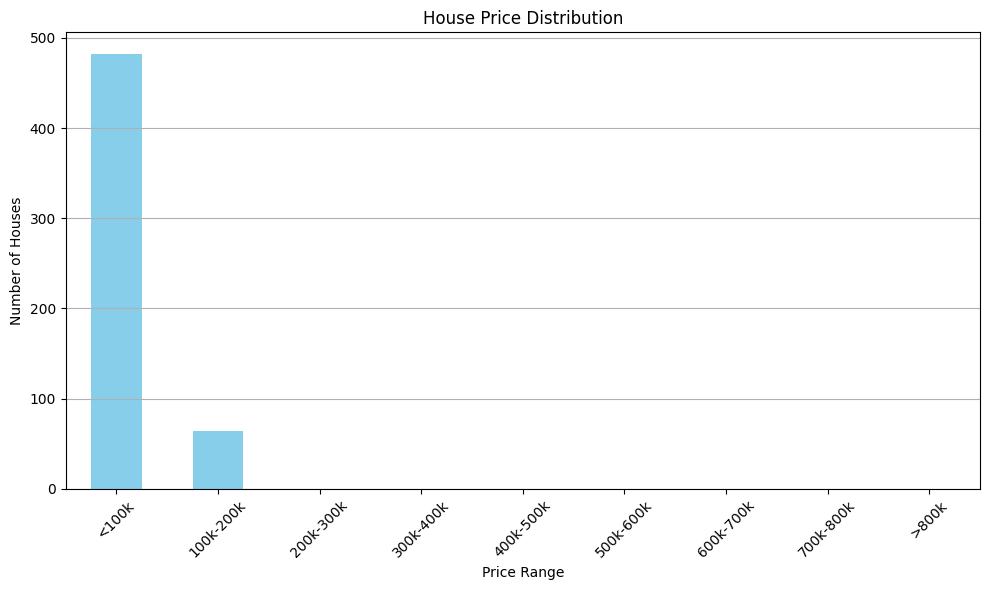

In [19]:
data['price_range'] = pd.cut(data['price'], bins=price_bins, labels=price_labels)
plt.figure(figsize=(10, 6))
data['price_range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('House Price Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()